In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, "../")

In [3]:
import torch.nn as nn
from torchsummary import summary

from data.input_transforms import InputTransform
from data.cifar import CIFAR
from data.dataloader import get_dataloader
from models.optimizer import optimizer, scheduler
from networks.twolayernet import TwolayerNetAdditionalLayers
from networks.convnet import ConvNetAdditionalLayers
from utils.viz import plot_multiple_quantities_by_time
from main import train, evaluate

In [4]:
def experiment(train_transforms, valid_transforms, network, num_epochs, batch_size, opt_args, sch_args=None):
    
    print(train_transforms)
    print(num_epochs)
    print(batch_size)
    print(opt_args)
    print(sch_args)
    
    # define the datasets
    train_transform = InputTransform(train_transforms)
    valid_transform = InputTransform(valid_transforms)
    train_dataset = CIFAR(root="../datasets/CIFAR-10/", mode="train", transform=train_transform)
    valid_dataset = CIFAR(root="../datasets/CIFAR-10/", mode="valid", transform=valid_transform)

    # obtain the train dataloader
    train_loader = get_dataloader(train_dataset, train=True, batch_size=batch_size, num_workers=0)
    valid_loader = get_dataloader(valid_dataset, train=False, batch_size=batch_size, num_workers=0)
    
    if network == "tln":
        net = TwolayerNetAdditionalLayers(num_inputs=3 * 32 * 32, num_hidden=[1024, 512, 128], num_classes=10)
    elif network == "cnn":
        net = ConvNetAdditionalLayers(in_channels=3, num_classes=10)
    else:
        raise ValueError()
    arch = type(net).__name__

    # define the optimizer and scheduler
    opt = optimizer(model_params=net.parameters(), **opt_args)
    sch = None
    if sch_args is not None:
        sch = scheduler(opt=opt, **sch_args)

    # define the loss function
    loss_fn = nn.CrossEntropyLoss()

    # train the model
    epochs, train_losses, train_metrics, valid_losses, valid_metrics = train(
        net, loss_fn, train_loader, valid_loader, num_epochs=num_epochs, opt=opt, sch=sch,
    )

    # plot training curves
    plot_multiple_quantities_by_time(
        quantities=[train_losses["loss"], valid_losses["loss"]],
        time=epochs,
        labels=["Train", "Validation"],
        title=f"{arch} Loss curves",
        show=True,
        save=True,
        save_path="../results/cnn_loss_plot_best.png",
        ylabel="Loss",
    )
    plot_multiple_quantities_by_time(
        quantities=[train_metrics["accuracy"], valid_metrics["accuracy"]],
        time=epochs,
        labels=["Train", "Validation"],
        title=f"{arch} Accuracy curves",
        show=True,
        save=True,
        save_path="../results/cnn_accu_plot_best.png",
        ylabel="Accuracy",
    )
    
    return net, loss_fn

[{'name': 'ToTensor', 'args': {}}, {'name': 'Normalize', 'args': {'mean': (0.5, 0.5, 0.5), 'std': (0.5, 0.5, 0.5)}}, {'name': 'RandomAffine', 'args': {'degrees': 10, 'translate': (0.1, 0.1), 'scale': (0.8, 1.2)}}]
100
128
{'name': 'Adam', 'lr': 0.001}
{'name': 'MultiStepLR', 'milestones': [50], 'gamma': 0.1}
Selecting 40000 for train.
Selecting 10000 for valid.


Evaluate: Epoch [1/100]: 100%|██████████████████████████████| 79/79 [00:01<00:00, 77.41it/s]                                               


VALID 	: Summary: Loss: 1.6285 Accuracy: 0.3969
TRAIN 	: Summary: Loss: 1.8811 Accuracy: 0.2975


Evaluate: Epoch [2/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 88.23it/s]                                               


VALID 	: Summary: Loss: 1.4793 Accuracy: 0.4473
TRAIN 	: Summary: Loss: 1.6304 Accuracy: 0.3978


Evaluate: Epoch [3/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 84.72it/s]                                               


VALID 	: Summary: Loss: 1.4441 Accuracy: 0.4614
TRAIN 	: Summary: Loss: 1.5500 Accuracy: 0.4293


Evaluate: Epoch [4/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 83.23it/s]                                               


VALID 	: Summary: Loss: 1.3377 Accuracy: 0.5126
TRAIN 	: Summary: Loss: 1.4851 Accuracy: 0.4560


Evaluate: Epoch [5/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 85.21it/s]                                               


VALID 	: Summary: Loss: 1.3046 Accuracy: 0.5247
TRAIN 	: Summary: Loss: 1.4341 Accuracy: 0.4763


Evaluate: Epoch [6/100]: 100%|██████████████████████████████| 79/79 [00:01<00:00, 78.41it/s]                                               


VALID 	: Summary: Loss: 1.2801 Accuracy: 0.5317
TRAIN 	: Summary: Loss: 1.3816 Accuracy: 0.4975


Evaluate: Epoch [7/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 86.45it/s]                                               


VALID 	: Summary: Loss: 1.2243 Accuracy: 0.5560
TRAIN 	: Summary: Loss: 1.3455 Accuracy: 0.5146


Evaluate: Epoch [8/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 87.27it/s]                                               


VALID 	: Summary: Loss: 1.1937 Accuracy: 0.5788
TRAIN 	: Summary: Loss: 1.3125 Accuracy: 0.5263


Evaluate: Epoch [9/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 81.91it/s]                                               


VALID 	: Summary: Loss: 1.1618 Accuracy: 0.5845
TRAIN 	: Summary: Loss: 1.2842 Accuracy: 0.5375


Evaluate: Epoch [10/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 86.34it/s]                                              


VALID 	: Summary: Loss: 1.1466 Accuracy: 0.5942
TRAIN 	: Summary: Loss: 1.2550 Accuracy: 0.5510


Evaluate: Epoch [11/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 87.81it/s]                                              


VALID 	: Summary: Loss: 1.1303 Accuracy: 0.6013
TRAIN 	: Summary: Loss: 1.2381 Accuracy: 0.5586


Evaluate: Epoch [12/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 81.69it/s]                                              


VALID 	: Summary: Loss: 1.0818 Accuracy: 0.6229
TRAIN 	: Summary: Loss: 1.2080 Accuracy: 0.5685


Evaluate: Epoch [13/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 82.94it/s]                                              


VALID 	: Summary: Loss: 1.0835 Accuracy: 0.6208
TRAIN 	: Summary: Loss: 1.1879 Accuracy: 0.5747


Evaluate: Epoch [14/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 85.67it/s]                                              


VALID 	: Summary: Loss: 1.1088 Accuracy: 0.6074
TRAIN 	: Summary: Loss: 1.1684 Accuracy: 0.5855


Evaluate: Epoch [15/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 80.60it/s]                                              


VALID 	: Summary: Loss: 1.0585 Accuracy: 0.6250
TRAIN 	: Summary: Loss: 1.1500 Accuracy: 0.5904


Evaluate: Epoch [16/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 85.47it/s]                                              


VALID 	: Summary: Loss: 1.0693 Accuracy: 0.6214
TRAIN 	: Summary: Loss: 1.1330 Accuracy: 0.5951


Evaluate: Epoch [17/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 86.26it/s]                                              


VALID 	: Summary: Loss: 1.0601 Accuracy: 0.6249
TRAIN 	: Summary: Loss: 1.1224 Accuracy: 0.6021


Evaluate: Epoch [18/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 86.57it/s]                                              


VALID 	: Summary: Loss: 1.0214 Accuracy: 0.6373
TRAIN 	: Summary: Loss: 1.1041 Accuracy: 0.6081


Evaluate: Epoch [19/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 87.89it/s]                                              


VALID 	: Summary: Loss: 1.0033 Accuracy: 0.6406
TRAIN 	: Summary: Loss: 1.0910 Accuracy: 0.6120


Evaluate: Epoch [20/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 85.01it/s]                                              


VALID 	: Summary: Loss: 0.9901 Accuracy: 0.6501
TRAIN 	: Summary: Loss: 1.0767 Accuracy: 0.6193


Evaluate: Epoch [21/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 85.75it/s]                                              


VALID 	: Summary: Loss: 0.9749 Accuracy: 0.6584
TRAIN 	: Summary: Loss: 1.0658 Accuracy: 0.6219


Evaluate: Epoch [22/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 84.82it/s]                                              


VALID 	: Summary: Loss: 0.9877 Accuracy: 0.6512
TRAIN 	: Summary: Loss: 1.0485 Accuracy: 0.6273


Evaluate: Epoch [23/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 86.36it/s]                                              


VALID 	: Summary: Loss: 0.9895 Accuracy: 0.6536
TRAIN 	: Summary: Loss: 1.0393 Accuracy: 0.6307


Evaluate: Epoch [24/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 86.55it/s]                                              


VALID 	: Summary: Loss: 0.9879 Accuracy: 0.6528
TRAIN 	: Summary: Loss: 1.0310 Accuracy: 0.6327


Evaluate: Epoch [25/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 83.85it/s]                                              


VALID 	: Summary: Loss: 0.9574 Accuracy: 0.6675
TRAIN 	: Summary: Loss: 1.0268 Accuracy: 0.6354


Evaluate: Epoch [26/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 81.82it/s]                                              


VALID 	: Summary: Loss: 0.9807 Accuracy: 0.6593
TRAIN 	: Summary: Loss: 1.0141 Accuracy: 0.6374


Evaluate: Epoch [27/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 84.89it/s]                                              


VALID 	: Summary: Loss: 0.9713 Accuracy: 0.6614
TRAIN 	: Summary: Loss: 1.0057 Accuracy: 0.6443


Evaluate: Epoch [28/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 85.54it/s]                                              


VALID 	: Summary: Loss: 0.9881 Accuracy: 0.6527
TRAIN 	: Summary: Loss: 0.9970 Accuracy: 0.6469


Evaluate: Epoch [29/100]: 100%|██████████████████████████████| 79/79 [00:01<00:00, 73.67it/s]                                              


VALID 	: Summary: Loss: 0.9560 Accuracy: 0.6706
TRAIN 	: Summary: Loss: 0.9876 Accuracy: 0.6518


Evaluate: Epoch [30/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 87.60it/s]                                              


VALID 	: Summary: Loss: 0.9560 Accuracy: 0.6689
TRAIN 	: Summary: Loss: 0.9849 Accuracy: 0.6493


Evaluate: Epoch [31/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 87.35it/s]                                              


VALID 	: Summary: Loss: 0.9161 Accuracy: 0.6773
TRAIN 	: Summary: Loss: 0.9774 Accuracy: 0.6537


Evaluate: Epoch [32/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 79.55it/s]                                              


VALID 	: Summary: Loss: 0.9413 Accuracy: 0.6711
TRAIN 	: Summary: Loss: 0.9685 Accuracy: 0.6555


Evaluate: Epoch [33/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 87.79it/s]                                              


VALID 	: Summary: Loss: 0.9341 Accuracy: 0.6746
TRAIN 	: Summary: Loss: 0.9605 Accuracy: 0.6611


Evaluate: Epoch [34/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 87.12it/s]                                              


VALID 	: Summary: Loss: 0.9403 Accuracy: 0.6704
TRAIN 	: Summary: Loss: 0.9585 Accuracy: 0.6587


Evaluate: Epoch [35/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 86.50it/s]                                              


VALID 	: Summary: Loss: 0.9156 Accuracy: 0.6747
TRAIN 	: Summary: Loss: 0.9434 Accuracy: 0.6662


Evaluate: Epoch [36/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 80.67it/s]                                              


VALID 	: Summary: Loss: 0.9208 Accuracy: 0.6699
TRAIN 	: Summary: Loss: 0.9527 Accuracy: 0.6606


Evaluate: Epoch [37/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 79.88it/s]                                              


VALID 	: Summary: Loss: 0.9057 Accuracy: 0.6821
TRAIN 	: Summary: Loss: 0.9436 Accuracy: 0.6654


Evaluate: Epoch [38/100]: 100%|██████████████████████████████| 79/79 [00:01<00:00, 76.25it/s]                                              


VALID 	: Summary: Loss: 0.9180 Accuracy: 0.6763
TRAIN 	: Summary: Loss: 0.9358 Accuracy: 0.6656


Evaluate: Epoch [39/100]: 100%|██████████████████████████████| 79/79 [00:01<00:00, 72.27it/s]                                              


VALID 	: Summary: Loss: 0.9406 Accuracy: 0.6694
TRAIN 	: Summary: Loss: 0.9320 Accuracy: 0.6690


Evaluate: Epoch [40/100]: 100%|██████████████████████████████| 79/79 [00:01<00:00, 66.90it/s]                                              


VALID 	: Summary: Loss: 0.8998 Accuracy: 0.6855
TRAIN 	: Summary: Loss: 0.9271 Accuracy: 0.6720


Evaluate: Epoch [41/100]: 100%|██████████████████████████████| 79/79 [00:01<00:00, 70.11it/s]                                              


VALID 	: Summary: Loss: 0.9218 Accuracy: 0.6769
TRAIN 	: Summary: Loss: 0.9239 Accuracy: 0.6730


Evaluate: Epoch [42/100]: 100%|██████████████████████████████| 79/79 [00:01<00:00, 78.44it/s]                                              


VALID 	: Summary: Loss: 0.8767 Accuracy: 0.6921
TRAIN 	: Summary: Loss: 0.9243 Accuracy: 0.6734


Evaluate: Epoch [43/100]: 100%|██████████████████████████████| 79/79 [00:01<00:00, 77.52it/s]                                              


VALID 	: Summary: Loss: 0.8942 Accuracy: 0.6846
TRAIN 	: Summary: Loss: 0.9140 Accuracy: 0.6776


Evaluate: Epoch [44/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 80.12it/s]                                              


VALID 	: Summary: Loss: 0.9081 Accuracy: 0.6850
TRAIN 	: Summary: Loss: 0.9125 Accuracy: 0.6771


Evaluate: Epoch [45/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 83.02it/s]                                              


VALID 	: Summary: Loss: 0.8921 Accuracy: 0.6846
TRAIN 	: Summary: Loss: 0.9029 Accuracy: 0.6807


Evaluate: Epoch [46/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 80.81it/s]                                              


VALID 	: Summary: Loss: 0.8956 Accuracy: 0.6814
TRAIN 	: Summary: Loss: 0.9054 Accuracy: 0.6795


Evaluate: Epoch [47/100]: 100%|██████████████████████████████| 79/79 [00:01<00:00, 73.55it/s]                                              


VALID 	: Summary: Loss: 0.8839 Accuracy: 0.6885
TRAIN 	: Summary: Loss: 0.9033 Accuracy: 0.6786


Evaluate: Epoch [48/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 86.62it/s]                                              


VALID 	: Summary: Loss: 0.8767 Accuracy: 0.6901
TRAIN 	: Summary: Loss: 0.8904 Accuracy: 0.6857


Evaluate: Epoch [49/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 86.48it/s]                                              


VALID 	: Summary: Loss: 0.8811 Accuracy: 0.6921
TRAIN 	: Summary: Loss: 0.8987 Accuracy: 0.6822


Evaluate: Epoch [50/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 86.26it/s]                                              


VALID 	: Summary: Loss: 0.9117 Accuracy: 0.6809
TRAIN 	: Summary: Loss: 0.8853 Accuracy: 0.6854


Evaluate: Epoch [51/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 83.95it/s]                                              


VALID 	: Summary: Loss: 0.8410 Accuracy: 0.7052
TRAIN 	: Summary: Loss: 0.8211 Accuracy: 0.7077


Evaluate: Epoch [52/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 86.81it/s]                                              


VALID 	: Summary: Loss: 0.8387 Accuracy: 0.7090
TRAIN 	: Summary: Loss: 0.8066 Accuracy: 0.7113


Evaluate: Epoch [53/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 87.39it/s]                                              


VALID 	: Summary: Loss: 0.8416 Accuracy: 0.7045
TRAIN 	: Summary: Loss: 0.8032 Accuracy: 0.7167


Evaluate: Epoch [54/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 85.51it/s]                                              


VALID 	: Summary: Loss: 0.8423 Accuracy: 0.7038
TRAIN 	: Summary: Loss: 0.7984 Accuracy: 0.7175


Evaluate: Epoch [55/100]: 100%|██████████████████████████████| 79/79 [00:01<00:00, 77.18it/s]                                              


VALID 	: Summary: Loss: 0.8329 Accuracy: 0.7100
TRAIN 	: Summary: Loss: 0.7974 Accuracy: 0.7202


Evaluate: Epoch [56/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 89.11it/s]                                              


VALID 	: Summary: Loss: 0.8407 Accuracy: 0.7076
TRAIN 	: Summary: Loss: 0.7924 Accuracy: 0.7179


Evaluate: Epoch [57/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 84.97it/s]                                              


VALID 	: Summary: Loss: 0.8339 Accuracy: 0.7107
TRAIN 	: Summary: Loss: 0.7937 Accuracy: 0.7191


Evaluate: Epoch [58/100]: 100%|██████████████████████████████| 79/79 [00:01<00:00, 77.84it/s]                                              


VALID 	: Summary: Loss: 0.8349 Accuracy: 0.7090
TRAIN 	: Summary: Loss: 0.7902 Accuracy: 0.7224


Evaluate: Epoch [59/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 88.01it/s]                                              


VALID 	: Summary: Loss: 0.8360 Accuracy: 0.7095
TRAIN 	: Summary: Loss: 0.7873 Accuracy: 0.7214


Evaluate: Epoch [60/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 84.22it/s]                                              


VALID 	: Summary: Loss: 0.8328 Accuracy: 0.7095
TRAIN 	: Summary: Loss: 0.7853 Accuracy: 0.7222


Evaluate: Epoch [61/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 88.05it/s]                                              


VALID 	: Summary: Loss: 0.8368 Accuracy: 0.7085
TRAIN 	: Summary: Loss: 0.7886 Accuracy: 0.7208


Evaluate: Epoch [62/100]: 100%|██████████████████████████████| 79/79 [00:01<00:00, 78.32it/s]                                              


VALID 	: Summary: Loss: 0.8409 Accuracy: 0.7090
TRAIN 	: Summary: Loss: 0.7801 Accuracy: 0.7233


Evaluate: Epoch [63/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 86.63it/s]                                              


VALID 	: Summary: Loss: 0.8289 Accuracy: 0.7126
TRAIN 	: Summary: Loss: 0.7786 Accuracy: 0.7238


Evaluate: Epoch [64/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 87.99it/s]                                              


VALID 	: Summary: Loss: 0.8352 Accuracy: 0.7111
TRAIN 	: Summary: Loss: 0.7844 Accuracy: 0.7208


Evaluate: Epoch [65/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 87.21it/s]                                              


VALID 	: Summary: Loss: 0.8314 Accuracy: 0.7112
TRAIN 	: Summary: Loss: 0.7847 Accuracy: 0.7220


Evaluate: Epoch [66/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 86.94it/s]                                              


VALID 	: Summary: Loss: 0.8317 Accuracy: 0.7105
TRAIN 	: Summary: Loss: 0.7744 Accuracy: 0.7256


Evaluate: Epoch [67/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 86.86it/s]                                              


VALID 	: Summary: Loss: 0.8309 Accuracy: 0.7138
TRAIN 	: Summary: Loss: 0.7821 Accuracy: 0.7233


Evaluate: Epoch [68/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 87.53it/s]                                              


VALID 	: Summary: Loss: 0.8333 Accuracy: 0.7093
TRAIN 	: Summary: Loss: 0.7806 Accuracy: 0.7242


Evaluate: Epoch [69/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 88.53it/s]                                              


VALID 	: Summary: Loss: 0.8325 Accuracy: 0.7113
TRAIN 	: Summary: Loss: 0.7826 Accuracy: 0.7243


Evaluate: Epoch [70/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 86.97it/s]                                              


VALID 	: Summary: Loss: 0.8341 Accuracy: 0.7070
TRAIN 	: Summary: Loss: 0.7774 Accuracy: 0.7250


Evaluate: Epoch [71/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 87.57it/s]                                              


VALID 	: Summary: Loss: 0.8314 Accuracy: 0.7108
TRAIN 	: Summary: Loss: 0.7765 Accuracy: 0.7244


Evaluate: Epoch [72/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 85.53it/s]                                              


VALID 	: Summary: Loss: 0.8290 Accuracy: 0.7130
TRAIN 	: Summary: Loss: 0.7764 Accuracy: 0.7268


Evaluate: Epoch [73/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 86.11it/s]                                              


VALID 	: Summary: Loss: 0.8290 Accuracy: 0.7106
TRAIN 	: Summary: Loss: 0.7770 Accuracy: 0.7242


Evaluate: Epoch [74/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 82.57it/s]                                              


VALID 	: Summary: Loss: 0.8324 Accuracy: 0.7102
TRAIN 	: Summary: Loss: 0.7759 Accuracy: 0.7251


Evaluate: Epoch [75/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 85.94it/s]                                              


VALID 	: Summary: Loss: 0.8282 Accuracy: 0.7130
TRAIN 	: Summary: Loss: 0.7707 Accuracy: 0.7258


Evaluate: Epoch [76/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 87.38it/s]                                              


VALID 	: Summary: Loss: 0.8296 Accuracy: 0.7123
TRAIN 	: Summary: Loss: 0.7647 Accuracy: 0.7300


Evaluate: Epoch [77/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 94.41it/s]                                              


VALID 	: Summary: Loss: 0.8283 Accuracy: 0.7127
TRAIN 	: Summary: Loss: 0.7679 Accuracy: 0.7284


Evaluate: Epoch [78/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 94.25it/s]                                              


VALID 	: Summary: Loss: 0.8275 Accuracy: 0.7153
TRAIN 	: Summary: Loss: 0.7665 Accuracy: 0.7286


Evaluate: Epoch [79/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 91.51it/s]                                              


VALID 	: Summary: Loss: 0.8430 Accuracy: 0.7103
TRAIN 	: Summary: Loss: 0.7651 Accuracy: 0.7286


Evaluate: Epoch [80/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 93.08it/s]                                              


VALID 	: Summary: Loss: 0.8396 Accuracy: 0.7108
TRAIN 	: Summary: Loss: 0.7682 Accuracy: 0.7282


Evaluate: Epoch [81/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 97.67it/s]                                              


VALID 	: Summary: Loss: 0.8325 Accuracy: 0.7109
TRAIN 	: Summary: Loss: 0.7664 Accuracy: 0.7269


Evaluate: Epoch [82/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 97.31it/s]                                              


VALID 	: Summary: Loss: 0.8282 Accuracy: 0.7138
TRAIN 	: Summary: Loss: 0.7709 Accuracy: 0.7257


Evaluate: Epoch [83/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 97.98it/s]                                              


VALID 	: Summary: Loss: 0.8252 Accuracy: 0.7138
TRAIN 	: Summary: Loss: 0.7702 Accuracy: 0.7285


Evaluate: Epoch [84/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 97.11it/s]                                              


VALID 	: Summary: Loss: 0.8348 Accuracy: 0.7108
TRAIN 	: Summary: Loss: 0.7711 Accuracy: 0.7267


Evaluate: Epoch [85/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 95.95it/s]                                              


VALID 	: Summary: Loss: 0.8300 Accuracy: 0.7138
TRAIN 	: Summary: Loss: 0.7714 Accuracy: 0.7259


Evaluate: Epoch [86/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 97.66it/s]                                              


VALID 	: Summary: Loss: 0.8325 Accuracy: 0.7122
TRAIN 	: Summary: Loss: 0.7604 Accuracy: 0.7294


Evaluate: Epoch [87/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 95.76it/s]                                              


VALID 	: Summary: Loss: 0.8294 Accuracy: 0.7094
TRAIN 	: Summary: Loss: 0.7595 Accuracy: 0.7326


Evaluate: Epoch [88/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 87.37it/s]                                              


VALID 	: Summary: Loss: 0.8263 Accuracy: 0.7127
TRAIN 	: Summary: Loss: 0.7596 Accuracy: 0.7311


Evaluate: Epoch [89/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 98.03it/s]                                              


VALID 	: Summary: Loss: 0.8303 Accuracy: 0.7111
TRAIN 	: Summary: Loss: 0.7617 Accuracy: 0.7294


Evaluate: Epoch [90/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 97.56it/s]                                              


VALID 	: Summary: Loss: 0.8328 Accuracy: 0.7117
TRAIN 	: Summary: Loss: 0.7623 Accuracy: 0.7285


Evaluate: Epoch [91/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 90.08it/s]                                              


VALID 	: Summary: Loss: 0.8382 Accuracy: 0.7106
TRAIN 	: Summary: Loss: 0.7580 Accuracy: 0.7302


Evaluate: Epoch [92/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 97.62it/s]                                              


VALID 	: Summary: Loss: 0.8239 Accuracy: 0.7143
TRAIN 	: Summary: Loss: 0.7657 Accuracy: 0.7293


Evaluate: Epoch [93/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 97.71it/s]                                              


VALID 	: Summary: Loss: 0.8244 Accuracy: 0.7146
TRAIN 	: Summary: Loss: 0.7576 Accuracy: 0.7335


Evaluate: Epoch [94/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 94.22it/s]                                              


VALID 	: Summary: Loss: 0.8276 Accuracy: 0.7109
TRAIN 	: Summary: Loss: 0.7610 Accuracy: 0.7281


Evaluate: Epoch [95/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 99.16it/s]                                              


VALID 	: Summary: Loss: 0.8262 Accuracy: 0.7153
TRAIN 	: Summary: Loss: 0.7580 Accuracy: 0.7320


Evaluate: Epoch [96/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 97.06it/s]                                              


VALID 	: Summary: Loss: 0.8379 Accuracy: 0.7106
TRAIN 	: Summary: Loss: 0.7601 Accuracy: 0.7301


Evaluate: Epoch [97/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 93.02it/s]                                              


VALID 	: Summary: Loss: 0.8263 Accuracy: 0.7136
TRAIN 	: Summary: Loss: 0.7634 Accuracy: 0.7288


Evaluate: Epoch [98/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 96.41it/s]                                              


VALID 	: Summary: Loss: 0.8236 Accuracy: 0.7164
TRAIN 	: Summary: Loss: 0.7668 Accuracy: 0.7287


Evaluate: Epoch [99/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 95.01it/s]                                              


VALID 	: Summary: Loss: 0.8228 Accuracy: 0.7126
TRAIN 	: Summary: Loss: 0.7577 Accuracy: 0.7294


Evaluate: Epoch [100/100]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 97.49it/s]                                             


VALID 	: Summary: Loss: 0.8360 Accuracy: 0.7146
TRAIN 	: Summary: Loss: 0.7541 Accuracy: 0.7339


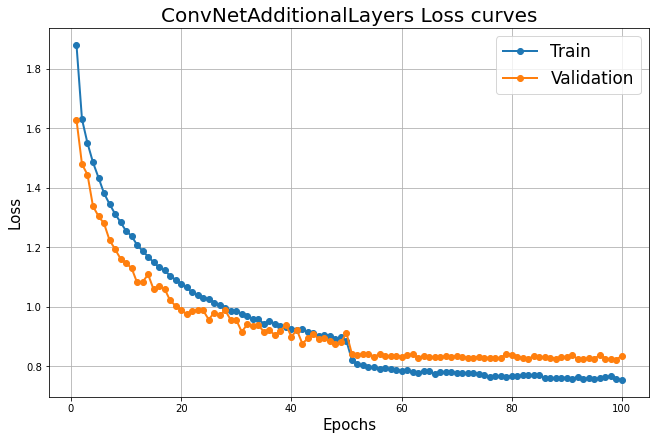

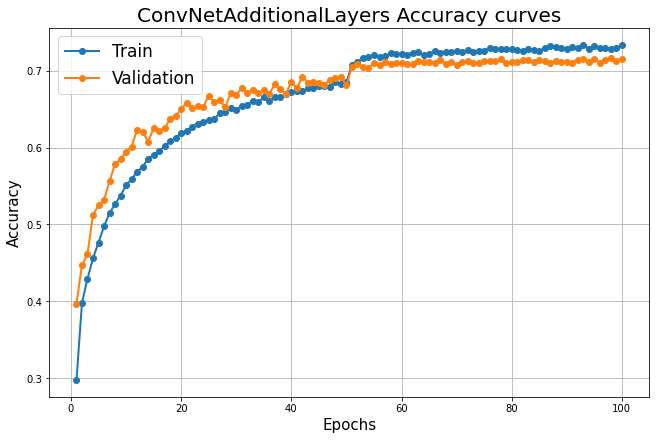

In [5]:
train_transforms = [
    {
        "name": "ToTensor",
        "args": {},
    },
    {
        "name": "Normalize",
        "args": {"mean": (0.5, 0.5, 0.5), "std": (0.5, 0.5, 0.5)},
    },
    {
        "name": "RandomAffine",
        "args": {"degrees": 10, "translate": (0.1, 0.1), "scale": (0.8, 1.2)},
    },
]
valid_transforms = [
    {
        "name": "ToTensor",
        "args": {},
    },
    {
        "name": "Normalize",
        "args": {"mean": (0.5, 0.5, 0.5), "std": (0.5, 0.5, 0.5)},
    },
]

network = "cnn"
num_epochs = 100
batch_size = 128
opt_args = {"name": "Adam", "lr": 1e-3}

sch_args = None
sch_args = {"name": "MultiStepLR", "milestones": [50], "gamma": 0.1}

net, loss_fn = experiment(
    train_transforms, valid_transforms, network, num_epochs, batch_size, opt_args, sch_args=sch_args,
)

In [6]:
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
              ReLU-2            [-1, 6, 28, 28]               0
         AvgPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
              ReLU-5           [-1, 16, 10, 10]               0
            Conv2d-6             [-1, 64, 6, 6]          25,664
              ReLU-7             [-1, 64, 6, 6]               0
            Conv2d-8            [-1, 128, 2, 2]         204,928
              ReLU-9            [-1, 128, 2, 2]               0
        AvgPool2d-10            [-1, 128, 1, 1]               0
           Linear-11                   [-1, 84]          10,836
             ReLU-12                   [-1, 84]               0
           Linear-13                   [-1, 10]             850
Total params: 245,150
Trainable params:

In [7]:
test_transforms = [
    {
        "name": "ToTensor",
        "args": {},
    },
    {
        "name": "Normalize",
        "args": {"mean": (0.5, 0.5, 0.5), "std": (0.5, 0.5, 0.5)},
    },
]
test_transform = InputTransform(test_transforms)
test_dataset = CIFAR(root="../datasets/CIFAR-10/", mode="test", transform=test_transform)
test_loader = get_dataloader(test_dataset, train=False, batch_size=128, num_workers=0)

In [8]:
evaluate(net, test_loader, loss_fn, 1, 1, "test")

Evaluate: Epoch [1/1]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 97.51it/s]                                                 

TEST 	: Summary: Loss: 0.8653 Accuracy: 0.7032


(0.8652956500838075, 0.7032)

In [ ]:
train_transforms = [
    {
        "name": "ToTensor",
        "args": {},
    },
    {
        "name": "Normalize",
        "args": {"mean": (0.5, 0.5, 0.5), "std": (0.5, 0.5, 0.5)},
    },
    {
        "name": "RandomAffine",
        "args": {"degrees": 10, "translate": (0.1, 0.1), "scale": (0.8, 1.2)},
    },
    {
        "name": "RandomHorizontalFlip",
        "args": {"p": 0.5},
    },
    {
        "name": "GaussianBlur",
        "args": {"kernel_size": 3},
    },
]
valid_transforms = [
    {
        "name": "ToTensor",
        "args": {},
    },
    {
        "name": "Normalize",
        "args": {"mean": (0.5, 0.5, 0.5), "std": (0.5, 0.5, 0.5)},
    },
]

network = "tln"
num_epochs = 200
batch_size = 128
opt_args = {"name": "Adam", "lr": 1e-4}
sch_args = {"name": "MultiStepLR", "milestones": [50, 100, 150], "gamma": 0.5}

net, loss_fn = experiment(
    train_transforms, valid_transforms, network, num_epochs, batch_size, opt_args, sch_args=sch_args,
)

[{'name': 'ToTensor', 'args': {}}, {'name': 'Normalize', 'args': {'mean': (0.5, 0.5, 0.5), 'std': (0.5, 0.5, 0.5)}}, {'name': 'RandomAffine', 'args': {'degrees': 10, 'translate': (0.1, 0.1), 'scale': (0.8, 1.2)}}, {'name': 'RandomHorizontalFlip', 'args': {'p': 0.5}}, {'name': 'GaussianBlur', 'args': {'kernel_size': 3}}]
200
128
{'name': 'Adam', 'lr': 0.0001}
{'name': 'MultiStepLR', 'milestones': [50, 100, 150], 'gamma': 0.5}
Selecting 40000 for train.
Selecting 10000 for valid.


Evaluate: Epoch [1/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 201.93it/s]                                              


VALID 	: Summary: Loss: 1.6523 Accuracy: 0.4132
TRAIN 	: Summary: Loss: 1.8843 Accuracy: 0.3275


Evaluate: Epoch [2/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 197.56it/s]                                              


VALID 	: Summary: Loss: 1.6062 Accuracy: 0.4327
TRAIN 	: Summary: Loss: 1.7201 Accuracy: 0.3887


Evaluate: Epoch [3/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 209.95it/s]                                              


VALID 	: Summary: Loss: 1.5213 Accuracy: 0.4555
TRAIN 	: Summary: Loss: 1.6599 Accuracy: 0.4099


Evaluate: Epoch [4/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 194.16it/s]                                              


VALID 	: Summary: Loss: 1.5072 Accuracy: 0.4609
TRAIN 	: Summary: Loss: 1.6158 Accuracy: 0.4259


Evaluate: Epoch [5/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 207.03it/s]                                              


VALID 	: Summary: Loss: 1.4634 Accuracy: 0.4773
TRAIN 	: Summary: Loss: 1.5910 Accuracy: 0.4357


Evaluate: Epoch [6/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 203.20it/s]                                              


VALID 	: Summary: Loss: 1.4618 Accuracy: 0.4796
TRAIN 	: Summary: Loss: 1.5603 Accuracy: 0.4488


Evaluate: Epoch [7/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 198.94it/s]                                              


VALID 	: Summary: Loss: 1.4307 Accuracy: 0.4862
TRAIN 	: Summary: Loss: 1.5378 Accuracy: 0.4570


Evaluate: Epoch [8/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 185.39it/s]                                              


VALID 	: Summary: Loss: 1.4079 Accuracy: 0.4961
TRAIN 	: Summary: Loss: 1.5214 Accuracy: 0.4616


Evaluate: Epoch [9/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 202.06it/s]                                              


VALID 	: Summary: Loss: 1.3957 Accuracy: 0.4989
TRAIN 	: Summary: Loss: 1.4989 Accuracy: 0.4695


Evaluate: Epoch [10/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 210.38it/s]                                             


VALID 	: Summary: Loss: 1.3706 Accuracy: 0.5087
TRAIN 	: Summary: Loss: 1.4802 Accuracy: 0.4793


Evaluate: Epoch [11/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 212.91it/s]                                             


VALID 	: Summary: Loss: 1.3656 Accuracy: 0.5103
TRAIN 	: Summary: Loss: 1.4683 Accuracy: 0.4817


Evaluate: Epoch [12/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 207.77it/s]                                             


VALID 	: Summary: Loss: 1.3538 Accuracy: 0.5138
TRAIN 	: Summary: Loss: 1.4538 Accuracy: 0.4890


Evaluate: Epoch [13/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 208.98it/s]                                             


VALID 	: Summary: Loss: 1.3457 Accuracy: 0.5223
TRAIN 	: Summary: Loss: 1.4415 Accuracy: 0.4921


Evaluate: Epoch [14/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 209.10it/s]                                             


VALID 	: Summary: Loss: 1.3256 Accuracy: 0.5271
TRAIN 	: Summary: Loss: 1.4272 Accuracy: 0.4978


Evaluate: Epoch [15/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 208.82it/s]                                             


VALID 	: Summary: Loss: 1.3254 Accuracy: 0.5304
TRAIN 	: Summary: Loss: 1.4191 Accuracy: 0.4995


Evaluate: Epoch [16/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 207.55it/s]                                             


VALID 	: Summary: Loss: 1.3055 Accuracy: 0.5380
TRAIN 	: Summary: Loss: 1.4071 Accuracy: 0.5021


Evaluate: Epoch [17/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 211.19it/s]                                             


VALID 	: Summary: Loss: 1.2996 Accuracy: 0.5374
TRAIN 	: Summary: Loss: 1.3964 Accuracy: 0.5073


Evaluate: Epoch [18/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 210.06it/s]                                             


VALID 	: Summary: Loss: 1.2889 Accuracy: 0.5370
TRAIN 	: Summary: Loss: 1.3880 Accuracy: 0.5114


Evaluate: Epoch [19/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 210.54it/s]                                             


VALID 	: Summary: Loss: 1.2802 Accuracy: 0.5461
TRAIN 	: Summary: Loss: 1.3814 Accuracy: 0.5131


Evaluate: Epoch [20/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 209.12it/s]                                             


VALID 	: Summary: Loss: 1.2668 Accuracy: 0.5530
TRAIN 	: Summary: Loss: 1.3696 Accuracy: 0.5149


Evaluate: Epoch [21/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 205.69it/s]                                             


VALID 	: Summary: Loss: 1.2736 Accuracy: 0.5473
TRAIN 	: Summary: Loss: 1.3654 Accuracy: 0.5212


Evaluate: Epoch [22/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 206.97it/s]                                             


VALID 	: Summary: Loss: 1.2581 Accuracy: 0.5551
TRAIN 	: Summary: Loss: 1.3581 Accuracy: 0.5194


Evaluate: Epoch [23/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 210.57it/s]                                             


VALID 	: Summary: Loss: 1.2674 Accuracy: 0.5498
TRAIN 	: Summary: Loss: 1.3489 Accuracy: 0.5246


Evaluate: Epoch [24/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 202.64it/s]                                             


VALID 	: Summary: Loss: 1.2529 Accuracy: 0.5524
TRAIN 	: Summary: Loss: 1.3449 Accuracy: 0.5265


Evaluate: Epoch [25/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 205.96it/s]                                             


VALID 	: Summary: Loss: 1.2503 Accuracy: 0.5558
TRAIN 	: Summary: Loss: 1.3364 Accuracy: 0.5283


Evaluate: Epoch [26/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 208.99it/s]                                             


VALID 	: Summary: Loss: 1.2436 Accuracy: 0.5579
TRAIN 	: Summary: Loss: 1.3281 Accuracy: 0.5334


Evaluate: Epoch [27/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 210.69it/s]                                             


VALID 	: Summary: Loss: 1.2431 Accuracy: 0.5546
TRAIN 	: Summary: Loss: 1.3267 Accuracy: 0.5326


Evaluate: Epoch [28/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 204.78it/s]                                             


VALID 	: Summary: Loss: 1.2417 Accuracy: 0.5597
TRAIN 	: Summary: Loss: 1.3206 Accuracy: 0.5334


Evaluate: Epoch [29/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 206.16it/s]                                             


VALID 	: Summary: Loss: 1.2446 Accuracy: 0.5620
TRAIN 	: Summary: Loss: 1.3157 Accuracy: 0.5358


Evaluate: Epoch [30/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 212.67it/s]                                             


VALID 	: Summary: Loss: 1.2279 Accuracy: 0.5675
TRAIN 	: Summary: Loss: 1.3096 Accuracy: 0.5379


Evaluate: Epoch [31/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 207.54it/s]                                             


VALID 	: Summary: Loss: 1.2191 Accuracy: 0.5634
TRAIN 	: Summary: Loss: 1.2978 Accuracy: 0.5412


Evaluate: Epoch [32/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 208.59it/s]                                             


VALID 	: Summary: Loss: 1.2299 Accuracy: 0.5608
TRAIN 	: Summary: Loss: 1.3053 Accuracy: 0.5383


Evaluate: Epoch [33/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 208.18it/s]                                             


VALID 	: Summary: Loss: 1.2303 Accuracy: 0.5622
TRAIN 	: Summary: Loss: 1.2905 Accuracy: 0.5453


Evaluate: Epoch [34/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 210.95it/s]                                             


VALID 	: Summary: Loss: 1.2215 Accuracy: 0.5680
TRAIN 	: Summary: Loss: 1.2885 Accuracy: 0.5463


Evaluate: Epoch [35/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 210.90it/s]                                             


VALID 	: Summary: Loss: 1.2239 Accuracy: 0.5691
TRAIN 	: Summary: Loss: 1.2850 Accuracy: 0.5457


Evaluate: Epoch [36/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 202.76it/s]                                             


VALID 	: Summary: Loss: 1.2102 Accuracy: 0.5741
TRAIN 	: Summary: Loss: 1.2769 Accuracy: 0.5501


Evaluate: Epoch [37/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 211.56it/s]                                             


VALID 	: Summary: Loss: 1.2112 Accuracy: 0.5753
TRAIN 	: Summary: Loss: 1.2793 Accuracy: 0.5491


Evaluate: Epoch [38/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 206.98it/s]                                             


VALID 	: Summary: Loss: 1.2054 Accuracy: 0.5776
TRAIN 	: Summary: Loss: 1.2746 Accuracy: 0.5513


Evaluate: Epoch [39/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 206.26it/s]                                             


VALID 	: Summary: Loss: 1.2131 Accuracy: 0.5674
TRAIN 	: Summary: Loss: 1.2649 Accuracy: 0.5537


Evaluate: Epoch [40/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 210.45it/s]                                             


VALID 	: Summary: Loss: 1.2106 Accuracy: 0.5755
TRAIN 	: Summary: Loss: 1.2672 Accuracy: 0.5534


Evaluate: Epoch [41/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 210.10it/s]                                             


VALID 	: Summary: Loss: 1.2068 Accuracy: 0.5730
TRAIN 	: Summary: Loss: 1.2624 Accuracy: 0.5562


Evaluate: Epoch [42/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 212.36it/s]                                             


VALID 	: Summary: Loss: 1.2014 Accuracy: 0.5721
TRAIN 	: Summary: Loss: 1.2550 Accuracy: 0.5556


Evaluate: Epoch [43/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 212.59it/s]                                             


VALID 	: Summary: Loss: 1.1945 Accuracy: 0.5775
TRAIN 	: Summary: Loss: 1.2531 Accuracy: 0.5572


Evaluate: Epoch [44/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 209.18it/s]                                             


VALID 	: Summary: Loss: 1.1997 Accuracy: 0.5757
TRAIN 	: Summary: Loss: 1.2473 Accuracy: 0.5581


Evaluate: Epoch [45/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 210.04it/s]                                             


VALID 	: Summary: Loss: 1.1878 Accuracy: 0.5794
TRAIN 	: Summary: Loss: 1.2427 Accuracy: 0.5631


Evaluate: Epoch [46/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 204.72it/s]                                             


VALID 	: Summary: Loss: 1.1872 Accuracy: 0.5845
TRAIN 	: Summary: Loss: 1.2391 Accuracy: 0.5629


Evaluate: Epoch [47/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 209.95it/s]                                             


VALID 	: Summary: Loss: 1.1824 Accuracy: 0.5850
TRAIN 	: Summary: Loss: 1.2357 Accuracy: 0.5634


Evaluate: Epoch [48/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 208.48it/s]                                             


VALID 	: Summary: Loss: 1.1843 Accuracy: 0.5792
TRAIN 	: Summary: Loss: 1.2308 Accuracy: 0.5657


Evaluate: Epoch [49/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 211.73it/s]                                             


VALID 	: Summary: Loss: 1.1914 Accuracy: 0.5779
TRAIN 	: Summary: Loss: 1.2274 Accuracy: 0.5675


Evaluate: Epoch [50/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 201.18it/s]                                             


VALID 	: Summary: Loss: 1.1843 Accuracy: 0.5862
TRAIN 	: Summary: Loss: 1.2224 Accuracy: 0.5661


Evaluate: Epoch [51/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 212.00it/s]                                             


VALID 	: Summary: Loss: 1.1616 Accuracy: 0.5926
TRAIN 	: Summary: Loss: 1.1982 Accuracy: 0.5800


Evaluate: Epoch [52/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 211.67it/s]                                             


VALID 	: Summary: Loss: 1.1554 Accuracy: 0.5911
TRAIN 	: Summary: Loss: 1.1942 Accuracy: 0.5802


Evaluate: Epoch [53/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 207.77it/s]                                             


VALID 	: Summary: Loss: 1.1632 Accuracy: 0.5900
TRAIN 	: Summary: Loss: 1.1976 Accuracy: 0.5772


Evaluate: Epoch [54/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 211.27it/s]                                             


VALID 	: Summary: Loss: 1.1533 Accuracy: 0.5925
TRAIN 	: Summary: Loss: 1.1862 Accuracy: 0.5828


Evaluate: Epoch [55/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 201.53it/s]                                             


VALID 	: Summary: Loss: 1.1580 Accuracy: 0.5913
TRAIN 	: Summary: Loss: 1.1870 Accuracy: 0.5817


Evaluate: Epoch [56/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 211.69it/s]                                             


VALID 	: Summary: Loss: 1.1543 Accuracy: 0.5920
TRAIN 	: Summary: Loss: 1.1814 Accuracy: 0.5834


Evaluate: Epoch [57/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 208.78it/s]                                             


VALID 	: Summary: Loss: 1.1442 Accuracy: 0.5941
TRAIN 	: Summary: Loss: 1.1841 Accuracy: 0.5819


Evaluate: Epoch [58/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 213.36it/s]                                             


VALID 	: Summary: Loss: 1.1501 Accuracy: 0.5944
TRAIN 	: Summary: Loss: 1.1783 Accuracy: 0.5820


Evaluate: Epoch [59/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 209.16it/s]                                             


VALID 	: Summary: Loss: 1.1483 Accuracy: 0.5958
TRAIN 	: Summary: Loss: 1.1735 Accuracy: 0.5857


Evaluate: Epoch [60/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 207.60it/s]                                             


VALID 	: Summary: Loss: 1.1501 Accuracy: 0.5952
TRAIN 	: Summary: Loss: 1.1686 Accuracy: 0.5869


Evaluate: Epoch [61/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 213.74it/s]                                             


VALID 	: Summary: Loss: 1.1429 Accuracy: 0.5973
TRAIN 	: Summary: Loss: 1.1713 Accuracy: 0.5862


Evaluate: Epoch [62/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 206.45it/s]                                             


VALID 	: Summary: Loss: 1.1513 Accuracy: 0.5951
TRAIN 	: Summary: Loss: 1.1731 Accuracy: 0.5857


Evaluate: Epoch [63/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 209.77it/s]                                             


VALID 	: Summary: Loss: 1.1524 Accuracy: 0.5927
TRAIN 	: Summary: Loss: 1.1676 Accuracy: 0.5908


Evaluate: Epoch [64/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 209.52it/s]                                             


VALID 	: Summary: Loss: 1.1461 Accuracy: 0.5939
TRAIN 	: Summary: Loss: 1.1703 Accuracy: 0.5860


Evaluate: Epoch [65/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 207.94it/s]                                             


VALID 	: Summary: Loss: 1.1406 Accuracy: 0.5940
TRAIN 	: Summary: Loss: 1.1644 Accuracy: 0.5903


Evaluate: Epoch [66/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 212.53it/s]                                             


VALID 	: Summary: Loss: 1.1431 Accuracy: 0.5942
TRAIN 	: Summary: Loss: 1.1557 Accuracy: 0.5929


Evaluate: Epoch [67/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 201.10it/s]                                             


VALID 	: Summary: Loss: 1.1392 Accuracy: 0.5970
TRAIN 	: Summary: Loss: 1.1643 Accuracy: 0.5914


Evaluate: Epoch [68/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 209.60it/s]                                             


VALID 	: Summary: Loss: 1.1412 Accuracy: 0.5989
TRAIN 	: Summary: Loss: 1.1622 Accuracy: 0.5892


Evaluate: Epoch [69/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 211.64it/s]                                             


VALID 	: Summary: Loss: 1.1422 Accuracy: 0.5974
TRAIN 	: Summary: Loss: 1.1587 Accuracy: 0.5949


Evaluate: Epoch [70/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 209.92it/s]                                             


VALID 	: Summary: Loss: 1.1481 Accuracy: 0.5965
TRAIN 	: Summary: Loss: 1.1579 Accuracy: 0.5889


Evaluate: Epoch [71/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 210.46it/s]                                             


VALID 	: Summary: Loss: 1.1370 Accuracy: 0.5995
TRAIN 	: Summary: Loss: 1.1518 Accuracy: 0.5942


Evaluate: Epoch [72/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 211.56it/s]                                             


VALID 	: Summary: Loss: 1.1370 Accuracy: 0.5988
TRAIN 	: Summary: Loss: 1.1496 Accuracy: 0.5941


Evaluate: Epoch [73/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 207.86it/s]                                             


VALID 	: Summary: Loss: 1.1347 Accuracy: 0.5988
TRAIN 	: Summary: Loss: 1.1496 Accuracy: 0.5935


Evaluate: Epoch [74/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 208.89it/s]                                             


VALID 	: Summary: Loss: 1.1500 Accuracy: 0.5966
TRAIN 	: Summary: Loss: 1.1531 Accuracy: 0.5924


Evaluate: Epoch [75/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 206.03it/s]                                             


VALID 	: Summary: Loss: 1.1409 Accuracy: 0.5919
TRAIN 	: Summary: Loss: 1.1496 Accuracy: 0.5946


Evaluate: Epoch [76/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 209.95it/s]                                             


VALID 	: Summary: Loss: 1.1300 Accuracy: 0.6002
TRAIN 	: Summary: Loss: 1.1414 Accuracy: 0.5964


Evaluate: Epoch [77/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 208.03it/s]                                             


VALID 	: Summary: Loss: 1.1444 Accuracy: 0.6001
TRAIN 	: Summary: Loss: 1.1467 Accuracy: 0.5945


Evaluate: Epoch [78/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 212.51it/s]                                             


VALID 	: Summary: Loss: 1.1276 Accuracy: 0.6034
TRAIN 	: Summary: Loss: 1.1434 Accuracy: 0.5960


Evaluate: Epoch [79/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 207.96it/s]                                             


VALID 	: Summary: Loss: 1.1368 Accuracy: 0.5993
TRAIN 	: Summary: Loss: 1.1346 Accuracy: 0.5975


Evaluate: Epoch [80/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 206.80it/s]                                             


VALID 	: Summary: Loss: 1.1381 Accuracy: 0.5978
TRAIN 	: Summary: Loss: 1.1390 Accuracy: 0.5987


Evaluate: Epoch [81/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 210.96it/s]                                             


VALID 	: Summary: Loss: 1.1353 Accuracy: 0.5993
TRAIN 	: Summary: Loss: 1.1337 Accuracy: 0.6001


Evaluate: Epoch [82/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 207.52it/s]                                             


VALID 	: Summary: Loss: 1.1365 Accuracy: 0.6004
TRAIN 	: Summary: Loss: 1.1379 Accuracy: 0.5995


Evaluate: Epoch [83/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 212.58it/s]                                             


VALID 	: Summary: Loss: 1.1332 Accuracy: 0.6037
TRAIN 	: Summary: Loss: 1.1331 Accuracy: 0.5975


Evaluate: Epoch [84/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 205.10it/s]                                             


VALID 	: Summary: Loss: 1.1536 Accuracy: 0.5922
TRAIN 	: Summary: Loss: 1.1374 Accuracy: 0.6010


Evaluate: Epoch [85/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 211.31it/s]                                             


VALID 	: Summary: Loss: 1.1349 Accuracy: 0.5989
TRAIN 	: Summary: Loss: 1.1289 Accuracy: 0.6027


Evaluate: Epoch [86/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 208.46it/s]                                             


VALID 	: Summary: Loss: 1.1245 Accuracy: 0.6012
TRAIN 	: Summary: Loss: 1.1313 Accuracy: 0.6022


Evaluate: Epoch [87/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 210.43it/s]                                             


VALID 	: Summary: Loss: 1.1344 Accuracy: 0.5986
TRAIN 	: Summary: Loss: 1.1282 Accuracy: 0.6006


Evaluate: Epoch [88/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 212.26it/s]                                             


VALID 	: Summary: Loss: 1.1303 Accuracy: 0.6024
TRAIN 	: Summary: Loss: 1.1317 Accuracy: 0.6012


Evaluate: Epoch [89/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 203.93it/s]                                             


VALID 	: Summary: Loss: 1.1339 Accuracy: 0.5978
TRAIN 	: Summary: Loss: 1.1278 Accuracy: 0.6018


Evaluate: Epoch [90/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 202.46it/s]                                             


VALID 	: Summary: Loss: 1.1284 Accuracy: 0.6001
TRAIN 	: Summary: Loss: 1.1310 Accuracy: 0.6021


Evaluate: Epoch [91/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 206.88it/s]                                             


VALID 	: Summary: Loss: 1.1332 Accuracy: 0.6004
TRAIN 	: Summary: Loss: 1.1203 Accuracy: 0.6041


Evaluate: Epoch [92/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 203.80it/s]                                             


VALID 	: Summary: Loss: 1.1283 Accuracy: 0.6028
TRAIN 	: Summary: Loss: 1.1240 Accuracy: 0.6029


Evaluate: Epoch [93/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 211.40it/s]                                             


VALID 	: Summary: Loss: 1.1300 Accuracy: 0.6001
TRAIN 	: Summary: Loss: 1.1173 Accuracy: 0.6049


Evaluate: Epoch [94/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 206.86it/s]                                             


VALID 	: Summary: Loss: 1.1295 Accuracy: 0.6022
TRAIN 	: Summary: Loss: 1.1197 Accuracy: 0.6058


Evaluate: Epoch [95/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 208.24it/s]                                             


VALID 	: Summary: Loss: 1.1173 Accuracy: 0.6040
TRAIN 	: Summary: Loss: 1.1150 Accuracy: 0.6051


Evaluate: Epoch [96/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 211.86it/s]                                             


VALID 	: Summary: Loss: 1.1266 Accuracy: 0.6049
TRAIN 	: Summary: Loss: 1.1187 Accuracy: 0.6026


Evaluate: Epoch [97/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 207.25it/s]                                             


VALID 	: Summary: Loss: 1.1262 Accuracy: 0.6059
TRAIN 	: Summary: Loss: 1.1108 Accuracy: 0.6083


Evaluate: Epoch [98/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 211.75it/s]                                             


VALID 	: Summary: Loss: 1.1196 Accuracy: 0.6027
TRAIN 	: Summary: Loss: 1.1135 Accuracy: 0.6051


Evaluate: Epoch [99/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 210.09it/s]                                             


VALID 	: Summary: Loss: 1.1233 Accuracy: 0.6031
TRAIN 	: Summary: Loss: 1.1121 Accuracy: 0.6090


Evaluate: Epoch [100/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 198.09it/s]                                            


VALID 	: Summary: Loss: 1.1251 Accuracy: 0.6038
TRAIN 	: Summary: Loss: 1.1128 Accuracy: 0.6079


Evaluate: Epoch [101/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 209.46it/s]                                            


VALID 	: Summary: Loss: 1.1128 Accuracy: 0.6049
TRAIN 	: Summary: Loss: 1.1009 Accuracy: 0.6132


Evaluate: Epoch [102/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 209.62it/s]                                            


VALID 	: Summary: Loss: 1.1158 Accuracy: 0.6073
TRAIN 	: Summary: Loss: 1.0949 Accuracy: 0.6165


Evaluate: Epoch [103/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 209.36it/s]                                            


VALID 	: Summary: Loss: 1.1111 Accuracy: 0.6085
TRAIN 	: Summary: Loss: 1.0958 Accuracy: 0.6128


Evaluate: Epoch [104/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 210.16it/s]                                            


VALID 	: Summary: Loss: 1.1129 Accuracy: 0.6087
TRAIN 	: Summary: Loss: 1.0939 Accuracy: 0.6150


Evaluate: Epoch [105/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 209.49it/s]                                            


VALID 	: Summary: Loss: 1.1088 Accuracy: 0.6073
TRAIN 	: Summary: Loss: 1.0912 Accuracy: 0.6138


Evaluate: Epoch [106/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 208.83it/s]                                            


VALID 	: Summary: Loss: 1.1089 Accuracy: 0.6087
TRAIN 	: Summary: Loss: 1.0928 Accuracy: 0.6158


Evaluate: Epoch [107/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 209.22it/s]                                            


VALID 	: Summary: Loss: 1.1120 Accuracy: 0.6061
TRAIN 	: Summary: Loss: 1.0814 Accuracy: 0.6174


Evaluate: Epoch [108/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 208.44it/s]                                            


VALID 	: Summary: Loss: 1.1082 Accuracy: 0.6086
TRAIN 	: Summary: Loss: 1.0891 Accuracy: 0.6182


Evaluate: Epoch [109/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 207.87it/s]                                            


VALID 	: Summary: Loss: 1.1106 Accuracy: 0.6055
TRAIN 	: Summary: Loss: 1.0871 Accuracy: 0.6181


Evaluate: Epoch [110/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 208.72it/s]                                            


VALID 	: Summary: Loss: 1.1089 Accuracy: 0.6070
TRAIN 	: Summary: Loss: 1.0882 Accuracy: 0.6172


Evaluate: Epoch [111/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 207.98it/s]                                            


VALID 	: Summary: Loss: 1.1125 Accuracy: 0.6097
TRAIN 	: Summary: Loss: 1.0836 Accuracy: 0.6185


Evaluate: Epoch [112/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 213.20it/s]                                            


VALID 	: Summary: Loss: 1.1089 Accuracy: 0.6097
TRAIN 	: Summary: Loss: 1.0853 Accuracy: 0.6171


Evaluate: Epoch [113/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 212.76it/s]                                            


VALID 	: Summary: Loss: 1.1057 Accuracy: 0.6102
TRAIN 	: Summary: Loss: 1.0836 Accuracy: 0.6174


Evaluate: Epoch [114/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 209.46it/s]                                            


VALID 	: Summary: Loss: 1.1112 Accuracy: 0.6085
TRAIN 	: Summary: Loss: 1.0819 Accuracy: 0.6202


Evaluate: Epoch [115/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 209.82it/s]                                            


VALID 	: Summary: Loss: 1.1092 Accuracy: 0.6085
TRAIN 	: Summary: Loss: 1.0818 Accuracy: 0.6170


Evaluate: Epoch [116/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 209.99it/s]                                            


VALID 	: Summary: Loss: 1.1163 Accuracy: 0.6063
TRAIN 	: Summary: Loss: 1.0818 Accuracy: 0.6187


Evaluate: Epoch [117/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 208.21it/s]                                            


VALID 	: Summary: Loss: 1.1087 Accuracy: 0.6078
TRAIN 	: Summary: Loss: 1.0843 Accuracy: 0.6175


Evaluate: Epoch [118/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 212.06it/s]                                            


VALID 	: Summary: Loss: 1.1097 Accuracy: 0.6093
TRAIN 	: Summary: Loss: 1.0729 Accuracy: 0.6213


Evaluate: Epoch [119/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 210.27it/s]                                            


VALID 	: Summary: Loss: 1.1107 Accuracy: 0.6089
TRAIN 	: Summary: Loss: 1.0793 Accuracy: 0.6191


Evaluate: Epoch [120/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 212.24it/s]                                            


VALID 	: Summary: Loss: 1.1171 Accuracy: 0.6069
TRAIN 	: Summary: Loss: 1.0833 Accuracy: 0.6153


Evaluate: Epoch [121/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 210.37it/s]                                            


VALID 	: Summary: Loss: 1.1049 Accuracy: 0.6094
TRAIN 	: Summary: Loss: 1.0799 Accuracy: 0.6202


Evaluate: Epoch [122/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 213.84it/s]                                            


VALID 	: Summary: Loss: 1.1088 Accuracy: 0.6113
TRAIN 	: Summary: Loss: 1.0789 Accuracy: 0.6197


Evaluate: Epoch [123/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 208.17it/s]                                            


VALID 	: Summary: Loss: 1.1097 Accuracy: 0.6091
TRAIN 	: Summary: Loss: 1.0753 Accuracy: 0.6192


Evaluate: Epoch [124/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 200.08it/s]                                            


VALID 	: Summary: Loss: 1.1130 Accuracy: 0.6080
TRAIN 	: Summary: Loss: 1.0709 Accuracy: 0.6220


Evaluate: Epoch [125/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 210.33it/s]                                            


VALID 	: Summary: Loss: 1.1066 Accuracy: 0.6123
TRAIN 	: Summary: Loss: 1.0779 Accuracy: 0.6180


Evaluate: Epoch [126/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 215.00it/s]                                            


VALID 	: Summary: Loss: 1.1090 Accuracy: 0.6096
TRAIN 	: Summary: Loss: 1.0758 Accuracy: 0.6207


Evaluate: Epoch [127/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 211.22it/s]                                            


VALID 	: Summary: Loss: 1.1073 Accuracy: 0.6127
TRAIN 	: Summary: Loss: 1.0725 Accuracy: 0.6220


Evaluate: Epoch [128/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 211.54it/s]                                            


VALID 	: Summary: Loss: 1.1117 Accuracy: 0.6083
TRAIN 	: Summary: Loss: 1.0785 Accuracy: 0.6196


Evaluate: Epoch [129/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 210.11it/s]                                            


VALID 	: Summary: Loss: 1.1120 Accuracy: 0.6143
TRAIN 	: Summary: Loss: 1.0725 Accuracy: 0.6196


Evaluate: Epoch [130/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 180.91it/s]                                            


VALID 	: Summary: Loss: 1.1078 Accuracy: 0.6142
TRAIN 	: Summary: Loss: 1.0733 Accuracy: 0.6209


Evaluate: Epoch [131/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 221.05it/s]                                            


VALID 	: Summary: Loss: 1.1038 Accuracy: 0.6125
TRAIN 	: Summary: Loss: 1.0719 Accuracy: 0.6222


Evaluate: Epoch [132/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 201.80it/s]                                            


VALID 	: Summary: Loss: 1.1048 Accuracy: 0.6131
TRAIN 	: Summary: Loss: 1.0711 Accuracy: 0.6214


Training: Epoch [133/200]:   2%|▌                             | 6/313 [00:00<00:11, 25.77it/s]                                             

In [7]:
test_transforms = [
    {
        "name": "ToTensor",
        "args": {},
    },
    {
        "name": "Normalize",
        "args": {"mean": (0.5, 0.5, 0.5), "std": (0.5, 0.5, 0.5)},
    },
]
test_transform = InputTransform(test_transforms)
test_dataset = CIFAR(root="../datasets/CIFAR-10/", mode="test", transform=test_transform)
test_loader = get_dataloader(test_dataset, train=False, batch_size=128, num_workers=0)

In [8]:
evaluate(net, test_loader, loss_fn, 1, 1, "test")

Evaluate: Epoch [1/1]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 97.51it/s]                                                 

TEST 	: Summary: Loss: 0.8653 Accuracy: 0.7032


(0.8652956500838075, 0.7032)